<a href="https://colab.research.google.com/github/isabellapompeu/datascience_portfolio/blob/master/Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <center> Dectecção de Fraudes em Cartões de Crédito
---

Desde de grandes desastres ecológicos e turismo espacial até pandemias que fizeram com que os seres humanos deixassem de caminhar livremente pelas ruas, 2020 foi, definitivamente, um ano de muitas reviravoltas, que por si só, causaram mudanças drásticas à respeito de como pensamos nossa organização social.

No Brasil, com o fechamento de algumas portas físicas dentro do comércio, outras "portas virtuais" se abriram: de acordo com a Ebit|Nielsen, o e-commerce brasileiro apresentou um crescimento de quase 50%, representando sua maior alta em 20 anos. Para se ter uma idéia, 72% dos brasileiros passaram a usar aplicativos para entrega de alimentos durante a quarentena (Mapodile/iStock).

Com o aumento das transações feitas a partir de cartões de crédito, uma prática não tão nova também *decolou*, fazendo com que muitos brasileiros perdesse o sono: **fraudes envolvendo cartões de crédito dobraram em relação ao mesmo período de 2019 (Consumidor.gov)**, esse quadro fez com que até mesmo o governo tivesse que implementar medidas para resolver a situação, como o lançamento da campanha #FiqueEsperto.

<p align=center>
<img src="https://sqnbankingsystems.com/wp-content/uploads/2019/12/debit-card-fraud-1170x410.jpg" width="70%"></p>

Uma boa solução pode gerar milhares ou até bilhões de reais em lucro (ou economia de gastos), não é mesmo? Nesse sentido, os setores privados também começaram a trabalhar arduamente para encontrar as melhores soluções para a identificação imediata dessas fraudes, sendo a utilização de algorítimos de machine learning uma delas.

**É por isso que neste *notebook* iremos analisar dados relativos a fraudes em cartões de crédito, um problema que tem se tornado cada vez mais grave a medida que o número de usúarios de cartões cresce no mundo. Ao fim, vamos estabelecer um modelo de *machine learning* efeciente para o reconhecimento dessas fraudes antes que seus clientes sejam cobrados por produtos que não compraram.**









## Obtenção de Dados

Nosso *dataset* foi retirado da plataforma [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), ele foi disponibilizado por empresas européias de cartão de crédito e contém transações anônimas feitas em setembro de 2013. Segundo a própria descrição, o *dataset* está altamente desbalanceado, sendo que apenas 0.172% das operações constituem fraude.

Nele, encontraremos principalmente variáveis númericas $(V1, V2, V3.. V28)$, que são resultado de uma transformação feita através da técnica PCA. Ok, espera, mas o que é PCA? Bom, resumidamente, essa técnica irá nos permitir reduzir as dimensões dos nossos dados, ao mesmo tempo que preserva suas características principais (Quer saber como a mágica acontece? Aqui vai outro excelente artigo para ler mais tarde ([*PCA na mão e no Pthon*](https://medium.com/@leandrocruvinel/pca-na-m%C3%A3o-e-no-python-d559e9c8f053) ). Devido a necessidade de algumas clásulas de confidencialidade, não é possível fornecer as *features* originais, com excessão dos que se seguem abaixo: 

* `Time` - segundos entre cada transação

* `Amount` - quantia da transação

* `Class` - variável resposta (1 = fraude; 0 = não é fraude)

Para facilitar a aquisição dos dados, foi criado um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

O *dataset* pode ser visto abaixo:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Analizando a dimensão do nosso dataframe
df.shape

(284807, 31)

Como podemos ver acima, nosso *dataset* possui 284.807 entradas e 31 colunas. Tudo bem, temos os dados em mãos, mas há muito trabalho a ser feito antes de criarmos o tão famigerado modelo de *machine learning*.

Vamos para o passo!

<img alt="Analisando Airbnb" width="100%" src="https://www.woodsrogers.com/wp-content/uploads/2016/04/Cybersecurity-header.jpg">

## Análise de Exploratória



A primeira coisa que precisamos fazer, é descobrir se nosso banco de dados realmente está apto para ser usado (*se ele está em um formato adequado, para que possamos aplicar nele, todas as maravilhas que a matemática tem a nos oferecer*). Como mencionado acima, o conjunto foi previamente tratato e teve suas dimensões reduzidas, o que nos diz que seu formato numérico já está de acordo com o esperado, dessa forma, nos resta apenas verificar se há espaços que não foram preenchidos em nosso *dataset*.

In [ ]:
# contagem de valores vazios
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Uau! Começamos bem não é mesmo? Como mostrado acima, não há **nenhum** valor vazio dentro do nosso *dataset*, o que nos deixa livres para prosseguirmos e começarmos *de fato* nossa análise exploratória.
Um resumo estatístico pode nos proporcionar a visão panorâmica que estamos precisando para a entender melhor o que está acontecendo ao nosso redor:

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Infelizmente, o PCA torna os componentes $(V1, V2, V3.. V28)$ difíceis de serem interpretados *a olho nu*, contudo, possuímos outras variáveis que podem nos ajudar a fazer algumas suposições sobre certas questões.

* `Time` - quando comparamos a média com o valor máximo de segundos, vemos que há uma diferença de cerca de 1,822 vezes entre um e outro, mostrando que há um certo equilibrío entre a disbruição dos valores.

* `Amount` - quando observamos os montantes o quadro muda completamente; o valor máximo é aproximadamente 291 vezes maior do que a média, o que pode indicar uma grande quantidade de *outliers*, talvez relacionado a diferença entre classes 0 e 1.

Hipóteses feitas, precisamos confirmá-las; a primeira coisa que faremos é uma comparação entre o número de `segundos entre cada transação` entre Transações Fraudulentas e Não-Fraudulentas.



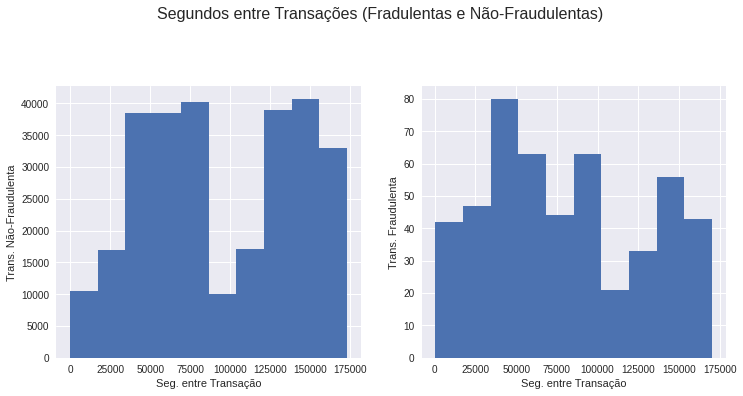

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (12, 5))
ax.hist(df['Time'].loc[df['Class'] == 0])
ax.set_xlabel('Seg. entre Transação')
ax.set_ylabel('Trans. Não-Fraudulenta')
ax1.hist(df['Time'].loc[df['Class'] == 1])
ax1.set_xlabel('Seg. entre Transação')
ax1.set_ylabel('Trans. Fraudulenta')
fig.suptitle('Segundos entre Transações (Fradulentas e Não-Fraudulentas)', y=1.1, fontsize=16)
plt.style.use("seaborn")

Como podemos ver, existem algumas diferenças entre os padrões encontrados em transações fraudulentas e não-fraudulentas, como por exemplo:
* Entre 82.500 e 100.000 segundos, o número de transações não-fraudulentas tende a cair, enquanto o de transações fraudulentas aumenta. 
* Além disso, a distribuição entre as transações fraudulentas é menos desigual, abrangendo de forma mais proporcional todos os intervalos de segundos.
Contudo, de forma geral, os dois cenários apresentam um comportamento semelhante, o que nos leva a pensar se essa seria a melhor variável para caracterizar diferenças entre ambas as situações.
* Para ambos os tipos de transação, a maior quantidade aconteceu não com intervalos muito altos ou muito pequenos de segundos, mas sim entre os intervalos medianos.

Nesse sentido, iremos agora analisar `Amount`:

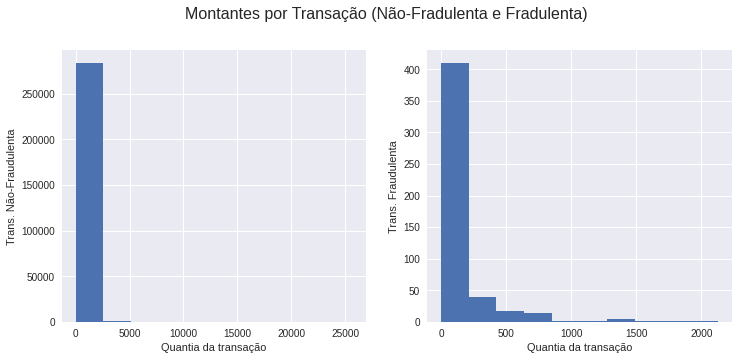

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (12, 5))
ax.hist(df['Amount'].loc[df['Class'] == 0])
ax.set_xlabel('Quantia da transação')
ax.set_ylabel('Trans. Não-Fraudulenta')
ax1.hist(df['Amount'].loc[df['Class'] == 1])
ax1.set_xlabel('Quantia da transação')
ax1.set_ylabel('Trans. Fraudulenta')
fig.suptitle('Montantes por Transação (Não-Fradulenta e Fradulenta)', y=1, fontsize=16)
plt.style.use("seaborn")

Parece que finalmente começamos a lidar com grandes diferenças entre os perfis de transações fraudulentas e não-fraudulentas! 

Apesar das operações autênticas se concentrarem majoritariamente em valores de até 2.500 euros, podemos notar alguns muito superiores acontecendo *aqui e ali*, alcançando somas que ultrapassam 25.000 euros. Contudo, esses valores estão muito mal disbruidos, indicando a presença de *outliers*. De forma geral, as transações se concentram entre 0 e 5.000 euros.

Quando comparamos essa, a realiadade das operações fraudulentas, temos que mais de 80% das transações tem um valor limite de 250 euros: uma soma 10 vezes menor do que encontramos em operações legítimas. E os outros 20%? Não se preocupe, eles não vão muito longe; a maior transação fraudulenta encontrada em nosso *dataset* foi de 2.125,87 euros, ou seja, ela não chega a alcançar nem mesmo os 2.500 euros, citados acima como a maior parcela de operações não-fraudulentas.

Mas o que todos esses histogramas nos dizem de fato sobre os nossos dados, afinal?

*O que podemos concluir, de fato, é que analisando o perfil das transações fraudulentas em nosso dataset, precisamos nos preocupar muito mais com valores menores, e que, portanto, passariam "despercebido", do que com grandes transferências de dinheiro, que, ao menos dentre o período esperado, não caracterizaram nenhum crime do gênero. O mesmo vale para `Time`, que, apesar de ter apresentado um pico entre 37.500 segundos e 50.000 segundos, manteve uma certa homogeneidade.*

Pensando nisso, vamos, por fim, analisar mais de perto o comportamento da variável `Amount`:

MÉDIA ENTRE TIPOS DE TRANSAÇÃO
Operações Não-Fraudulentas : 88.29
Operações Fraudulentas : 122.21

MEDIANA ENTRE TIPOS DE TRANSAÇÃO
Operações Não-Fraudulentas : 22.00
Operações Fraudulentas : 9.25




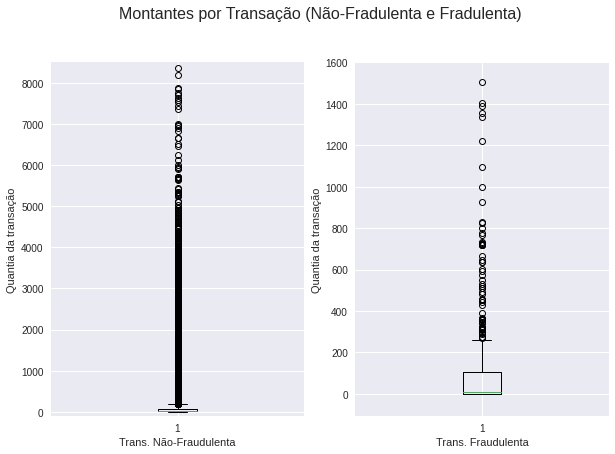

In [ ]:
print('\033[1mMÉDIA ENTRE TIPOS DE TRANSAÇÃO\033[m')
print(f'\033[0mOperações Não-Fraudulentas : {df["Amount"].loc[df["Class"] == 0].mean():.2f}')
print(f'Operações Fraudulentas : {df["Amount"].loc[df["Class"] == 1].mean():.2f}')
print()

print('\033[1mMEDIANA ENTRE TIPOS DE TRANSAÇÃO')
print(f'\033[0mOperações Não-Fraudulentas : {df["Amount"].loc[df["Class"] == 0].median():.2f}')
print(f'Operações Fraudulentas : {df["Amount"].loc[df["Class"] == 1].median():.2f}')
print()
print()

fig, (ax, ax1) = plt.subplots(1, 2, figsize = (10, 6.5))
ax.boxplot(df["Amount"].loc[df["Class"] == 0])
ax.set_xlabel('Trans. Não-Fraudulenta')
ax.set_ylabel('Quantia da transação')
ax.set_ylim(bottom=-100, top=8500)
ax1.boxplot(df['Amount'].loc[df['Class'] == 1])
ax1.set_xlabel('Trans. Fraudulenta')
ax1.set_ylabel('Quantia da transação')
ax1.set_ylim(top=1600)
fig.suptitle('Montantes por Transação (Não-Fradulenta e Fradulenta)', y=1, fontsize=16)
plt.style.use("seaborn")

Nos boxplots acima, os *outliers* não foram retirados pois eles foram justamente os pontos que não conseguimos avaliar nitidamente. O que fizemos, foi reduzir os limites de y, pois a partir de um certo ponto, a quantidade de *outliers* era muito pouco presentativa e prejudicava nossa visualização gráfica.

* Enquanto transações não-fraudulentas apresentam um limite inferior de 18,81 euros, as fraudulentas quase dobraram esse limite, com aproximadamente 35,13 euros. Isso nos mostra que, apesar desse tipo de crime evitar operar com grandes quantidades de dinheiro, ele também tende a começar com valores maiores que transações não-fraudulentas.

* O limite superior de operações fraudulendas  também é levemente superior (227,10 e 195,39; respectivamente), nesse sentido, também podemos usar a mesma lógica: fraudes em cartões tendem a optar por valores mais baixos para evitar suspeitas, dentro de um intervalo que cubra os riscos.

Agora que discorremos consideravelmente sobre as variáveis que possuiamos uma possibilidade maior de interpretação, podemos plotar um gráfico de densidade geral, para verificar se encontramos pontos fora da curva entre nossos componentes principais.

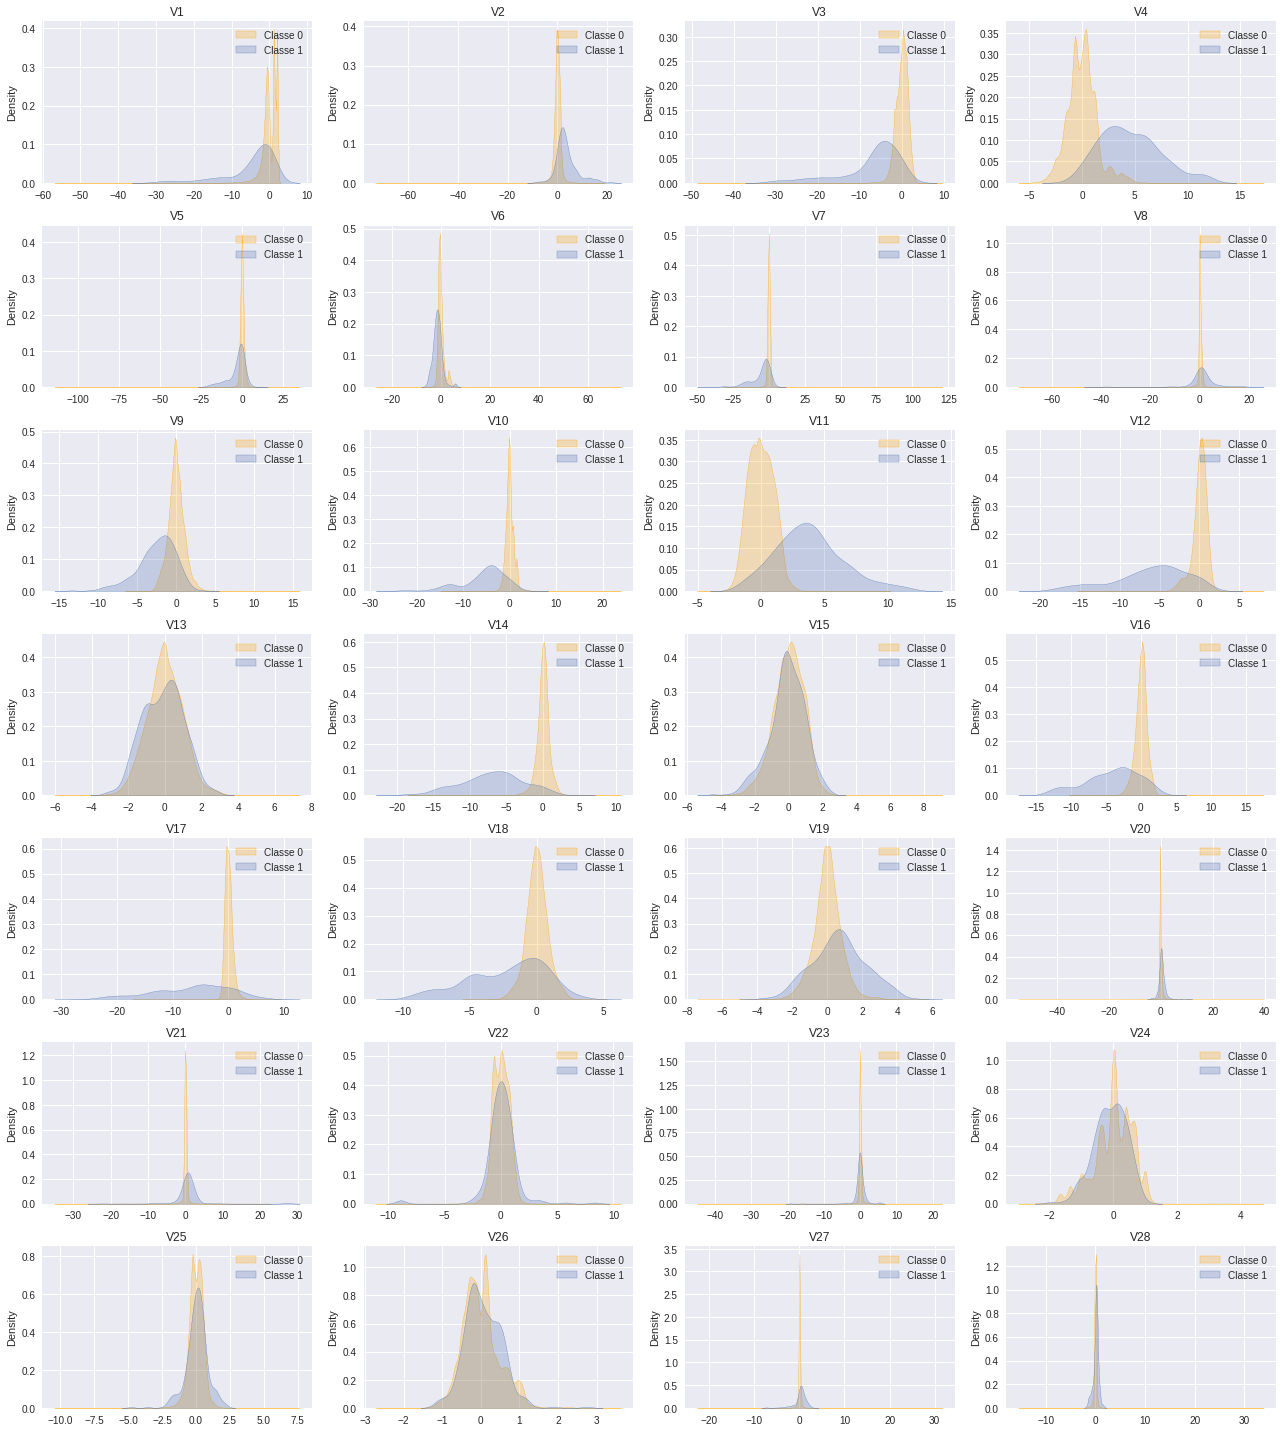

In [ ]:
nomes = df.drop(['Amount', 'Time', 'Class'], axis=1).columns
plots = len(nomes)
class1 = df[df.Class == 1]
class0 = df[df.Class == 0]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,20))
idx = 0
for col in nomes:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(class0[col], shade=True, color='orange')
  sns.kdeplot(class1[col], shade=True)
  plt.legend(('Classe 0', 'Classe 1'))
  plt.xlabel('')
  plt.title(col, fontsize=12)
plt.tight_layout() ; 

Ok, e o que, exatamente esse amontoado de gráficos pode nos dizer? 

Se observarmos atentamente, veremos que, enquanto há componentes onde as transições fraudulentas e não-fraudulentas se sobrepõe quase que perfeitamente, em outras, o comportamento é tão diferente que poderiamos apontar e dizer *'EI! Isso é um roubo!'* com quase 100% de certeza. Por exemplo:
os componentes $V15$ e $V25$ são extremamente parecidos, seria muito difícil diferenciar os tipos de transação apenas a partir deles. 

Já quando olhamos para o $V12$ e o $V17$, temos uma situação completamente diferente, mostrando até mesmo que quando o indicador atinge certos valores é quase certo que aquilo é uma fraude.

E é exatamente esse conjunto de características que usaremos para montar matrizes de correlação e identificar com precisão fraudes em cartões de crédito. Entretanto, para nós, seria um tanto quanto trabalhoso analisar componente por componente, e é por isso que deixaremos esse trabalho à cargo de nossos algoritimos.

Próximo passo: modelos de Machine Lerarning!

## Pré-Processamento de Dados

Tudo bem, não estamos indo *diretamente* para o pré-processamento de dados, mas dessa vez eu prometo que não vamos demorar muito. Sério.

Como vimos logo no começo, temos um conjunto de dados extremamente desbalanceado. *Ok, mas o que coquinhos isso significa?* Vejamos o gráfico abaixo, afinal, uma imagem vale mais que mil palavras.


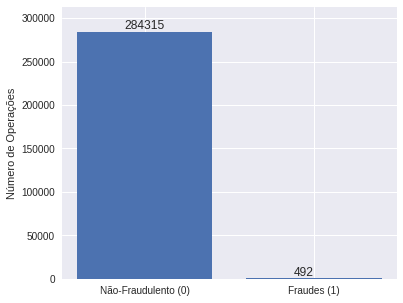

In [ ]:
data = {'Não-Fraudulento (0)': df['Class'].value_counts()[0], 
        'Fraudes (1)': df['Class'].value_counts()[1],}
nomes = data.keys()
valores = list(data.values())
posicao = [0, 1] 
altura = [valores[0], valores[1]]
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(nomes, valores)
for i in range(2):
   ax.text(x=posicao[i]-0.12, y=altura[i]+3000, s=str(altura[i]),   
           fontsize=12)
ax.set_ymargin(0.1)
ax.set_ylabel('Número de Operações')
plt.style.use("seaborn");

A imagem acima nos mostra que a diferença entre transações fraudulentas e não-fraudulentas é *terrivelmente* desproporcional, por que, bom, como podemos imaginar, mesmo que estejamos em um cenário onde sua quantidade vem aumentando, operações ilícitas continuam sendo a uma minoria se comparadas com o todo.

E o que exatamente isso tem a ver com nossos algoritimos de *machine learning*? Esse tipo de situação faz com que nosso modelo tenha uma má interpretação do nosso conjunto de dados, já que ele absorverá muito mais informações de um grupo, do que de outro e, assim, será mais 'tendencioso'.

E é por isso iremos realizar agora o balanceamento dos nossos dados, ou seja, utilizaremos de técnicas de pré-processamento de dados para que eles tenham proporções mais semelhantes. Nesse caso, faremos o *Under-samplig* dos nossos dados: iremos remover operações não-fraudulentas aleatóriamente, até a proporção entre ambas as classes nos permita construir modelos mais confiáveis. Depois disso, plotaremos o gráfico da nova distribuição de dados do nosso *dataset*.

(Para se aprofundar sobre o tratamento de dados desbalanceados, sugiro a leitura [deste](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/) artigo.)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


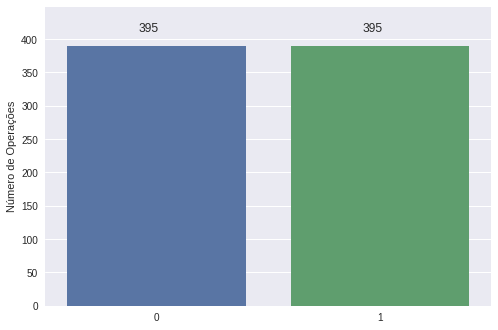

In [ ]:
# importar pacotes
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# definfir X_test e y_test
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# transformar dados
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# plotar gráfico
ax = sns.countplot(y_res,)
altura = [395, 395]
posicao = [0, 1] 
for i in range(2):
   ax.text(x=posicao[i]-0.08, y=altura[i]+16, s=str(altura[i]),   
           fontsize=12)
plt.ylabel('Número de Operações')
plt.margins(y=0.15)
plt.style.use("seaborn") ;

*Et voilá*, Agora sim podemos trabalhar: **vamos criar nossos modelos!**

## Modelos de Machine Learning

Tudo bem, parece que as coisas estão finalmente começando a ficar sérias por aqui. Nosso trabalho, agora, se baseia em dividir eficientemente nosso conjunto de dados em dois grupos distintos (fraudes ou não) a partir de outras características, préviamente determinadas.

Nesse sentido, estamos frente à frente a um problema de classificação e, dentro do mundo das classificações, há uma enorme quantidade de técnicas que poderimos testar; **neste artigo, nos concentraremos em comparar uma regressão logística e uma árvore de decisões, observando qual apresentará melhor desempenho identificando fraudes em cartões de crédito.**

<p align=center>
<img src="https://i.pinimg.com/originals/51/0d/a9/510da98abbe03f7ff9a7ce6eb0f362e7.jpg" width="45%"></p>



### Regressão Logística

De forma geral, seu modelo é semelhante ao de uma regressão linear, contudo, há uma deformação na curva que separa os indivíduos e os contem em um intervalo entre 0 e 1. Resumidamente, uma regressão logísca utiliza da probabilidade para dizer se um determinado indivíduo pertence a um grupo ou outro.

Vamos começar a pô-la em prática, lembrando que acima, já determinamos quais serão nossos dados de treino e teste.

               - RELATÓRIO DE CLASSIFICAÇÃO -               

               precision    recall  f1-score   support

           0     0.9998    0.9754    0.9875     56860
           1     0.0623    0.9118    0.1167       102

    accuracy                         0.9753     56962
   macro avg     0.5311    0.9436    0.5521     56962
weighted avg     0.9982    0.9753    0.9859     56962


                   - MATRIZ DE CONFUSÃO -                   



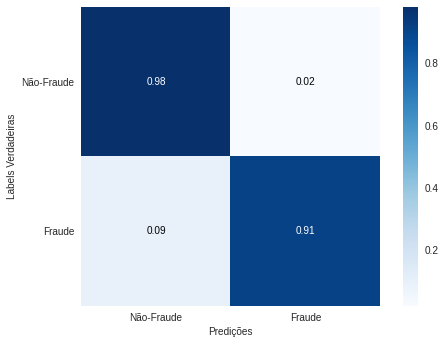

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

# escolher e importar modelo
from sklearn.linear_model import LogisticRegression

# instânciar e escolher hiperparâmetros
model = LogisticRegression()

# já separamos os dados entre features da matrix e target vector
# já dividimos nossos dados entre treino e teste

# padronizar dados para o modelo de regressão logística
scaler = StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

# treinar modelo
model.fit(X_res, y_res)

# prever em cima dos dados novos
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# imprimir relatório de classificação
print(f'\033[1m{"- RELATÓRIO DE CLASSIFICAÇÃO -":^60}\033[m')
print()
print('\033[0m', classification_report(y_test, y_pred, digits=4))
print()

# imprimir matriz de confusão
print(f'\033[1m{"- MATRIZ DE CONFUSÃO -":^60}\033[m')
print()
import scikitplot as skplt
ax = skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True) # porcentagem
ax.set_title('')
ax.set_xlabel('Predições'); ax.set_ylabel('Labels Verdadeiras'); 
ax.xaxis.set_ticklabels(['Não-Fraude', 'Fraude']);
ax.yaxis.set_ticklabels(['Não-Fraude', 'Fraude' ]);


Na matriz de confusão, podemos ver a porcentagem de acertos e erros que nosso modelo cometeu, tanto para Fraudes, quanto para Não-Fraudes. **Nosso principal objetivo aqui, é fazer um modelo que detecte fraudes eficientemente, e é por isso que focaremos em analisar essa classe**. A matriz nos mostra que os casos que foram identificadas como Fraudes e eram, de fato fraudes, são 91% do total (de casos fraudulentos); já aqueles que não, representam 2%. Pensando nisso, 9% de todas as Fraudes não foi detectada.

Agora, observando de uma forma mais ampla, temos uma acurácia de 97,5%, ou seja, nosso modelo acertou 97,5% de suas predições. Como esperado, ele apresentou um melhor desempenho para as operações não-fraudulentas e isso afetou no cálculo dessa métrica. É por isso que, em situações onde os dados são originalmente desbalanceados, a acurácia não é uma boa métrica para avaliação do modelo, nesses casos, iremos focar o `f1-score`, ou `recall` (uma vez que o recall irá reduzir o número de falsos negativos).


### Árvore de Decisões

Já as Decision Trees atuam de forma diferente: elas criam bifurcações e nós, a medida que nutrimos elas com mais características (variáveis), separando os dados em conjuntos até chegar na divisão desejada.

Vejamos como implementá-la abaixo:

               - RELATÓRIO DE CLASSIFICAÇÃO -               

               precision    recall  f1-score   support

           0     0.9998    0.9216    0.9591     56860
           1     0.0204    0.9118    0.0400       102

    accuracy                         0.9216     56962
   macro avg     0.5101    0.9167    0.4996     56962
weighted avg     0.9981    0.9216    0.9575     56962


                   - MATRIZ DE CONFUSÃO -                   



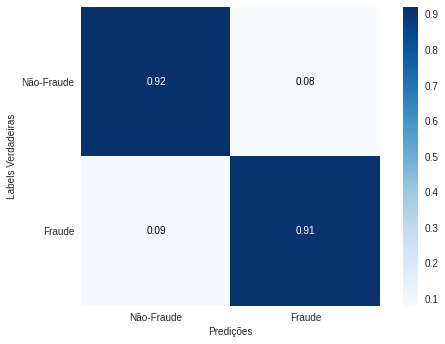

In [47]:
# escolher e importar modelo
from sklearn.tree import DecisionTreeClassifier

# instanciar e escolher os hiperparâmetros
model2 = DecisionTreeClassifier()

# já separamos os features matrix do target vector
# já dividimos os dados entre treino e teste

# treinar modelo
model2.fit(X_res, y_res)

# fazer previsões com o modelo
y_pred2 = model2.predict(X_test)

# imprimir relatório de classificação
print(f'\033[1m{"- RELATÓRIO DE CLASSIFICAÇÃO -":^60}\033[m')
print()
print('\033[0m', classification_report(y_test, y_pred2, digits=4))
print()

# imprimir matriz de confusão
print(f'\033[1m{"- MATRIZ DE CONFUSÃO -":^60}\033[m')
print()
ax= skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)
ax.set_title('')
ax.set_xlabel('Predições');ax.set_ylabel('Labels Verdadeiras'); 
ax.xaxis.set_ticklabels(['Não-Fraude', 'Fraude']);
ax.yaxis.set_ticklabels(['Não-Fraude', 'Fraude' ]);

Se observarmos rápidamente, poderíamos ter a falsa impressão de que o modelo de regressão logística é muito superior a árvore de decisões, uma vez que, além de sua acurácia ser maior, o número de casos não-fraudulentos que foram corretamente classificados é **menor**.

Contudo, vimos que a acurácia não é uma boa métrica para esse tipo de situação, e que, além disso, nosso principal objetivo é observar o comportamento do modelo para o número de casos fraudulentos. Nesse sentido, temos que o número de casos fraudulentos classificados corretamente foi de 91%, assim como para a regressão logística. A diferença porém, se encontra no número de falsos positivos (que foi maior), digamos que nesse caso, a empresa "incomodaria um pouco mais seus clientes", porém sem benefícios na eficiência das classificações.

Bom, nesse sentido, o modelo de regressão logística se revelou sim uma melhor opção, porém, esse tipo de situação nos mostra que devemos ficar atentos, pois as diferenças entre um e outro podem não ser tão grandes, e, dependendo dos interesses da empresa, a escolha do modelo pode não ser tão clara.

## Conclusão

Recebemos dados limpos e bem tratados, o que facilitou muito o caminho até aqui!

Após uma análise exploritória pudemos identificar padrões entre determinadas operações, que foram, posteriormente utilizadas pelos nossos modelos para as classificações.

Ao comparar opções, pudemos analizar que cada modelo possui um comportamento diferente em relação aos dados - seja em relação aos *false negatives*, *true positives*, etc - que podem ser interessantes para nosso clientes ou não, e é esse tipo de observação que deve ser feita. Além disso, nesse caso, conseguimos obter bons resultados com os parâmetros padrão de todos os modelos, porém, sempre há espaço para otimização.